In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X=[[ 12 , 39 ],
[ 20 , 36 ],
[ 28 , 30 ],
[ 18 , 52 ],
[ 29 , 54 ],
[ 33 , 46 ],
[ 24 , 55 ],
[ 45 , 59 ],
[ 45 , 63 ],
[ 52 , 70 ],
[ 51 , 66 ],
[ 52 , 63 ],
[ 55 , 58 ],
[ 53 , 23 ],
[ 55 , 14 ],
[ 61 , 8 ],
[ 64 , 19 ],
[ 69 , 7 ],
[ 72 , 24 ]]

X=np.array(X)

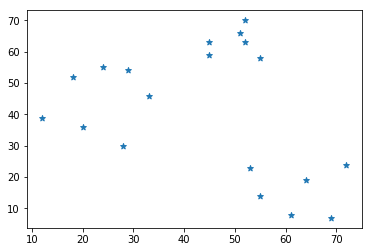

In [3]:
plt.scatter(X[:,0],X[:,1],marker='*' ) 
plt.show()

### Selecting K random centroids

In [4]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(X)), k)
        print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=X[ri[i]]
            break

    return centroids

In [5]:
k = 3
centroids=get_random_centroids(k)
print(centroids)

[ 9 16  5]
{0: array([52, 70]), 1: array([64, 19]), 2: array([33, 46])}


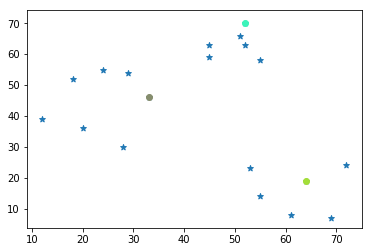

In [6]:
plt.scatter(X[:,0],X[:,1],marker='*' ) 
for i in centroids.keys():
    plt.scatter(*centroids[i], c=[np.random.rand(3,)]) 
plt.show()

### Calculate error and updating centroids

In [7]:
def e_dist(x1, x2):
    return np.linalg.norm(x1-x2)

In [8]:
def e_dist(x1, x2):
    return np.sqrt( (x1[0]-x2[0])**2 +  (x1[1]-x2[1])**2)

In [9]:
e_dist(np.array([0,0]), np.array([3,4]))

5.0

In [10]:
x=[12,39]
dd=[e_dist(x,v) for k,v in centroids.items() ]
print(dd)
closest=dd.index( min(dd) )
print(closest)

[50.60632371551998, 55.71355310873648, 22.135943621178654]
2


In [11]:
# x=[12,39]
for x in X:             #for each sample
    dists=[e_dist(x,v) for k,v in centroids.items() ]
    closest=dists.index( min(dists) )
    mc=list(centroids.values())[closest]
    print('x=',x,' closest centroid=',mc)

x= [12 39]  closest centroid= [33 46]
x= [20 36]  closest centroid= [33 46]
x= [28 30]  closest centroid= [33 46]
x= [18 52]  closest centroid= [33 46]
x= [29 54]  closest centroid= [33 46]
x= [33 46]  closest centroid= [33 46]
x= [24 55]  closest centroid= [33 46]
x= [45 59]  closest centroid= [52 70]
x= [45 63]  closest centroid= [52 70]
x= [52 70]  closest centroid= [52 70]
x= [51 66]  closest centroid= [52 70]
x= [52 63]  closest centroid= [52 70]
x= [55 58]  closest centroid= [52 70]
x= [53 23]  closest centroid= [64 19]
x= [55 14]  closest centroid= [64 19]
x= [61  8]  closest centroid= [64 19]
x= [64 19]  closest centroid= [64 19]
x= [69  7]  closest centroid= [64 19]
x= [72 24]  closest centroid= [64 19]


In [12]:
nitr=100

old_centroids={}
for i in range(nitr):
    clusters={}
    for ik,iv in centroids.items():
        clusters[ik]=[]
    
    print('centroids: ',centroids)
    for x in X:
        dists=[e_dist(x,v) for k,v in centroids.items() ] #k distance from k centroid.
        closest=dists.index( min(dists) )
        clusters[closest].append(x)

    for ik in range(k):
        old_centroids[ik]=centroids[ik].copy()
    #update centroids.
    nc={}
    for ik in range(k):
        avg_c=np.array(clusters[ik]).mean(axis=0)
        nc[ik]=avg_c  #average.
        centroids[ik]=avg_c
    
    #checking centroids update.
    nupdate=0
    for ik in range(k):
        if e_dist( centroids[ik], old_centroids[ik] ) > 0:
            nupdate+=1
    if nupdate==0:
        print('NO FURTHER UPDATE')
        break
        
#     break
    

centroids:  {0: array([52, 70]), 1: array([64, 19]), 2: array([33, 46])}
centroids:  {0: array([50.        , 63.16666667]), 1: array([62.33333333, 15.83333333]), 2: array([23.42857143, 44.57142857])}
NO FURTHER UPDATE


In [13]:
print(centroids)

{0: array([50.        , 63.16666667]), 1: array([62.33333333, 15.83333333]), 2: array([23.42857143, 44.57142857])}


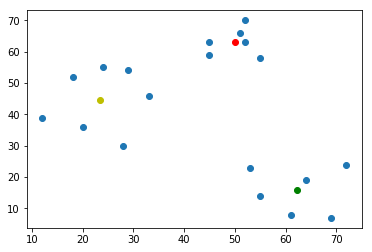

In [14]:
plt.scatter(X[:,0],X[:,1],marker='o' )

colmap = {0: 'r', 1: 'g', 2: 'y', 3:'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

In [15]:
centroids

{0: array([50.        , 63.16666667]),
 1: array([62.33333333, 15.83333333]),
 2: array([23.42857143, 44.57142857])}

### Finding Good K using elbow method.

In [16]:
sse=0
for cluster,centroid in zip(clusters.values() ,centroids.values()):
#     print(centroid) 
    for x in cluster:
        d=e_dist(x, centroid)
        sse+=d*d
print('sse=',sse)

sse= 1624.4285714285716


In [22]:
nitr=100
sses={}
for k in range(1,10):   #trying for different k value.
    
    centroids=get_random_centroids(k)
    old_centroids={}
    for i in range(nitr):
        clusters={}
        for ik,iv in centroids.items():
            clusters[ik]=[]

        print('centroids: ',centroids)
        for x in X:
            dists=[e_dist(x,v) for k,v in centroids.items() ] #k distance from k centroid.
            closest=dists.index( min(dists) )
            clusters[closest].append(x)

        for ik in range(k):
            old_centroids[ik]=centroids[ik].copy()
        #update centroids.
        nc={}
        for ik in range(k):
            avg_c=np.array(clusters[ik]).mean(axis=0)
            nc[ik]=avg_c  #average.
            centroids[ik]=avg_c

        #checking centroids update.
        nupdate=0
        for ik in range(k):
            if e_dist( centroids[ik], old_centroids[ik] ) > 0:
                nupdate+=1
        if nupdate==0:
            print('NO FURTHER UPDATE')
            break

    #     break

    sse=0
    for cluster,centroid in zip(clusters.values() ,centroids.values()):
    #     print(centroid) 
        for x in cluster:
            d=e_dist(x, centroid)
            sse+=d*d
    print('k=',k, 'sse=',sse)
    sses[k]=sse

[6]
centroids:  {0: array([24, 55])}
centroids:  {0: array([44.10526316, 41.36842105])}
NO FURTHER UPDATE
k= 1 sse= 13654.210526315788
[14 10]
centroids:  {0: array([55, 14]), 1: array([51, 66])}
centroids:  {0: array([52.75 , 20.125]), 1: array([37.81818182, 56.81818182])}
centroids:  {0: array([57.42857143, 17.85714286]), 1: array([36.33333333, 55.08333333])}
centroids:  {0: array([62.33333333, 15.83333333]), 1: array([35.69230769, 53.15384615])}
NO FURTHER UPDATE
k= 2 sse= 5022.628205128206
[ 0  5 11]
centroids:  {0: array([12, 39]), 1: array([33, 46]), 2: array([52, 63])}
centroids:  {0: array([16.66666667, 42.33333333]), 1: array([46.22222222, 28.44444444]), 2: array([53.14285714, 57.57142857])}
centroids:  {0: array([23.42857143, 44.57142857]), 1: array([62.33333333, 15.83333333]), 2: array([50.        , 63.16666667])}
NO FURTHER UPDATE
k= 3 sse= 1624.4285714285718
[12  7  6  6]
[ 9  9 17 17]
[10  8 17 18]
centroids:  {0: array([51, 66]), 1: array([45, 63]), 2: array([69,  7]), 3

In [23]:
sses

{1: 13654.210526315788,
 2: 5022.628205128206,
 3: 1624.4285714285718,
 4: 1393.595238095238,
 5: 1342.2285714285715,
 6: 1123.0119047619048,
 7: 690.5833333333333,
 8: 547.75,
 9: 539.6666666666667}

In [27]:
ks=[i+1 for i in range(len(sses.values()))]
print(ks)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


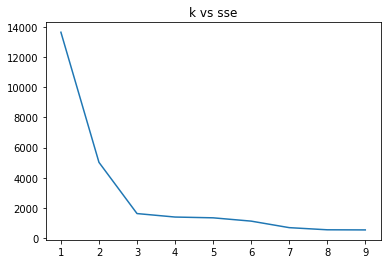

In [28]:
# sses=[9486.846153846154, 1928.595238095238, 2195.8333333333335]
plt.plot(ks, sses.values())
plt.title('k vs sse')
plt.show()

<b>From the graph above, it seems k=3 is best.

### Using Scikit-Learn

In [29]:
from sklearn.cluster import KMeans

In [30]:
km=KMeans(n_clusters=3)

In [31]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
sc=km.cluster_centers_
print(sc)

[[23.42857143 44.57142857]
 [50.         63.16666667]
 [62.33333333 15.83333333]]


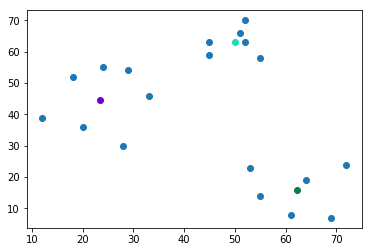

In [33]:
plt.scatter(X[:,0],X[:,1],marker='o' )

for i,c in enumerate(sc):
    plt.scatter(c[0], c[1], c=[np.random.rand(3,)])
plt.show()